In [ ]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import colorcet as cc
import os 

import statsmodels.api as sm
from scipy import stats


def get_me_some_colours(n_colours,sns_pal=True):
    if sns_pal:
        if n_colours >8:
            return sns.color_palette(cc.glasbey, n_colours)
        else:
            return sns.color_palette("Dark2", n_colours)
    else:
        #give warning
        print("Warning: returning non-seaborn colour palette, you might just want to add .as_hex() to the end of your returned seaborn colour palette")
        return cc.glasbey[:n_colours]
    
    
def hexbin_plot(data,x_axis,y_axis,log_scale=True,log_constant=1,nbin=10,plot_type="hex"):

    """function to plot a hexbin plot

    :param data: a pandas dataframe of 
    :param log_scale: boolean log scale the data, defaults to True
    :return: a hexbin plot
    """
    ##tests
    assert isinstance(data, pd.DataFrame)
    assert pd.api.types.is_numeric_dtype(data[x_axis])
    assert pd.api.types.is_numeric_dtype(data[y_axis])
    assert len(data) > 1


    # plot stuff


    cmap = plt.cm.viridis
    values = [cmap(i) for i in range(cmap.N)]
    values[0] = (1,1,1,1)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', values, cmap.N)

    if log_scale:
        data[x_axis+"_log10"]=np.log10(data[x_axis]+log_constant)
        x_axis=x_axis+"_log10"
        data[y_axis+"_log10"]=np.log10(data[x_axis]+log_constant)
        x_axis=y_axis+"_log10"
       

    data.dropna(inplace=True)
    

    #plt.hexbin
    sns.jointplot(
        y=data[y_axis],
        x=data[x_axis],
        kind="hex",
        #change colour scale
        cmap=cmap,
        hue_norm=(0,0.000001),
            gridsize=(nbin, nbin),
        vmin=0,
     
        joint_kws={'mincnt': 1}
        
            )
    

In [63]:


data_in=pd.read_csv("/home3/oml4h/PLM_SARS-CoV-2/Results/DMS_investigation/ESM2-HA80_DMS_with_probabilities_grammar.csv")
data_in=data_in[data_in["wildtype"]!=data_in["mutant"]]
data_in.head(20)

,site,wildtype,mutant,sera escape,MDCKSIAT1 cell entry,pH stability,sequential_site,region,nt changes to codon,mutation_probability,canonical_mutation,mut_in_fasta,dms_sequence_aa,relative_grammaticality,mut_prob2,semantic_score
0,1,Q,A,0.088250,-0.12260,0.004237,1,HA1,2,0.005650,Q1A,Q1A,Q,-4.590707,0.005650,1.264312
1,1,Q,C,0.017790,-0.57320,-0.014300,1,HA1,3,0.022957,Q1C,Q1C,Q,-3.188787,0.022957,1.686422
2,1,Q,D,-0.053950,0.25500,-0.021900,1,HA1,2,0.001412,Q1D,Q1D,Q,-5.977550,0.001412,1.016567
3,1,Q,E,-0.019630,0.29410,0.006890,1,HA1,1,0.009153,Q1E,Q1E,Q,-4.108301,0.009153,0.709073
4,1,Q,F,-0.163500,-0.71410,-0.001402,1,HA1,3,0.004835,Q1F,Q1F,Q,-4.746434,0.004835,1.033270
5,1,Q,G,-0.031800,-0.01987,0.020690,1,HA1,2,0.002556,Q1G,Q1G,Q,-5.383847,0.002556,1.560536
6,1,Q,H,0.038370,-0.23490,-0.004620,1,HA1,1,0.007355,Q1H,Q1H,Q,-4.327019,0.007355,1.455417
7,1,Q,I,-0.180400,-0.80900,-0.014880,1,HA1,2,0.023414,Q1I,Q1I,Q,-3.169064,0.023414,1.355520
8,1,Q,K,0.049180,-0.11150,0.001008,1,HA1,1,0.005315,Q1K,Q1K,Q,-4.651943,0.005315,1.782132
9,1,Q,L,-0.166600,-1.56800,0.033410,1,HA1,1,0.016982,Q1L,Q1L,Q,-3.490221,0.016982,1.713124


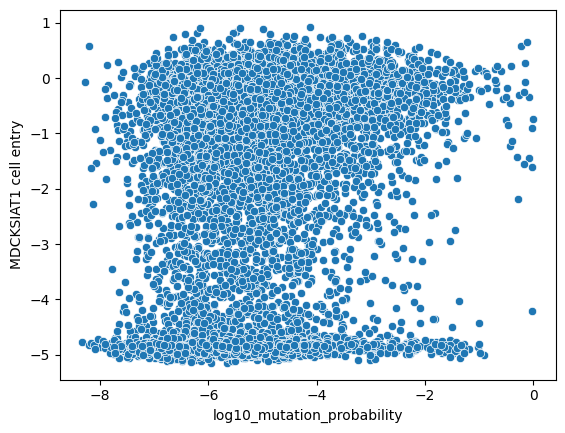

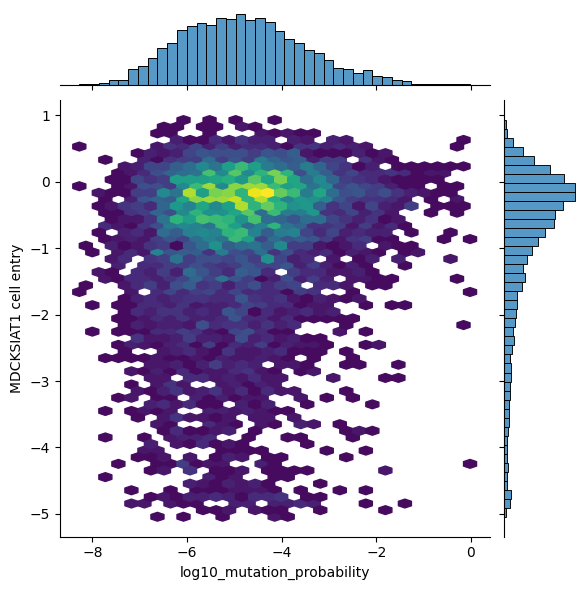

In [64]:

# scale y axis log

data_in["log10_mutation_probability"] = np.log10(data_in["mutation_probability"])
sns.scatterplot(data=data_in, y="MDCKSIAT1 cell entry", x="log10_mutation_probability")

hexbin_plot(data_in,x_axis="log10_mutation_probability",
                y_axis="MDCKSIAT1 cell entry",log_scale=False,plot_type="hex",
                nbin=30)

<Axes: xlabel='MDCKSIAT1 cell entry', ylabel='semantic_score'>

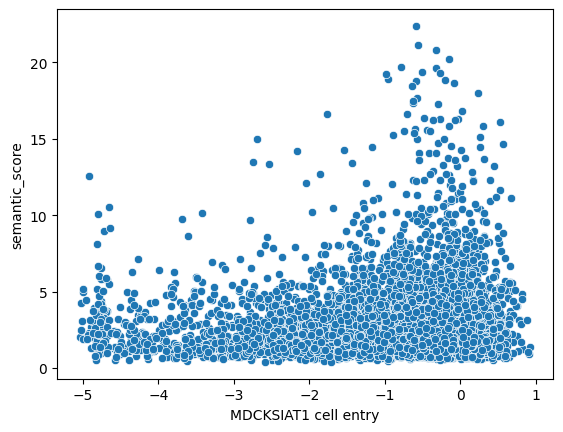

In [65]:

# scale y axis log
sns.scatterplot(data=data_in, x="MDCKSIAT1 cell entry", y="semantic_score")


<Axes: xlabel='sera escape', ylabel='semantic_score'>

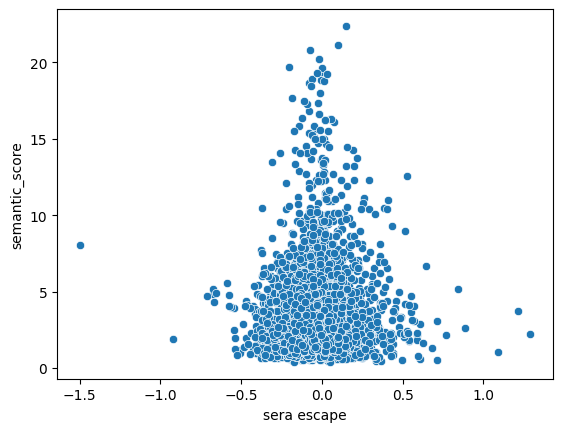

In [66]:
sns.scatterplot(data=data_in, x="sera escape", y="semantic_score")

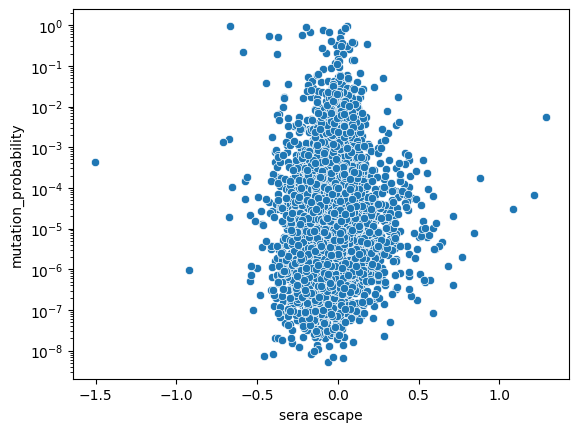

In [67]:
sns.scatterplot(data=data_in, x="sera escape", y="mutation_probability").set_yscale("log")

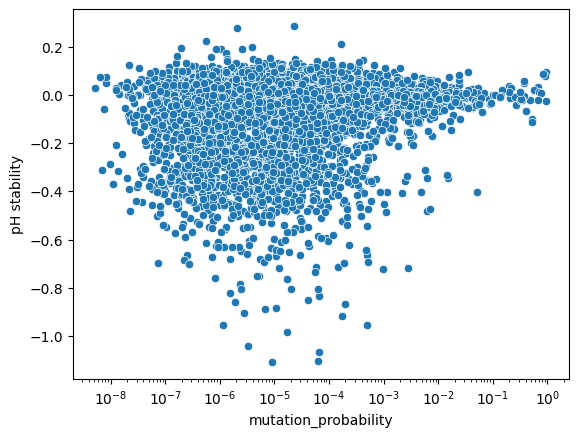

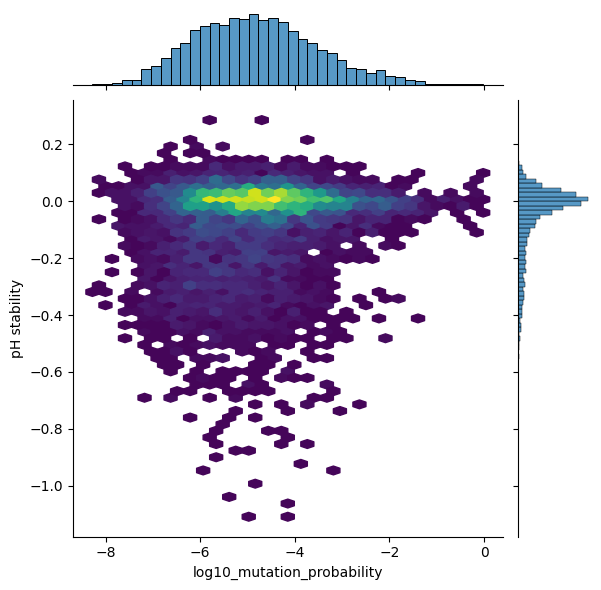

In [68]:
sns.scatterplot(data=data_in, y="pH stability", x="mutation_probability").set_xscale("log")


hexbin_plot(data_in,x_axis="log10_mutation_probability",
                y_axis="pH stability",log_scale=False,plot_type="hex",
                nbin=30)

In [86]:
# do stats and see if log (mutation proabbility ) correlates with glm of the three variables:


# Select the columns and remove rows with NaN or inf values
data_clean = data_in[["MDCKSIAT1 cell entry", "sera escape", "pH stability", "mutation_probability"]].copy()
data_clean = data_clean.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
data_clean = data_clean.dropna()  # Drop rows with any NaN values
data_clean["absolute_stability"] = np.abs(data_clean["pH stability"])

X = data_clean[["MDCKSIAT1 cell entry", "sera escape", "pH stability"]]

# X = data_clean[["absolute_stability"]]
#X = data_clean[["pH stability"]]
y = np.log10(data_clean["mutation_probability"])




X = sm.add_constant(X)  # Adds a constant term to the predictors
model = sm.OLS(y, X).fit()

predictions = model.predict(X)


# Print the summary
print(model.summary())
print(f"\nNumber of observations used: {len(data_clean)}")
print(f"Number of observations dropped: {len(data_in) - len(data_clean)}")


                             OLS Regression Results                             
Dep. Variable:     mutation_probability   R-squared:                       0.044
Model:                              OLS   Adj. R-squared:                  0.043
Method:                   Least Squares   F-statistic:                     82.92
Date:                  Thu, 04 Dec 2025   Prob (F-statistic):           1.89e-52
Time:                          17:34:57   Log-Likelihood:                -9097.2
No. Observations:                  5412   AIC:                         1.820e+04
Df Residuals:                      5408   BIC:                         1.823e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

In [80]:
# do stats and see if log (mutation proabbility ) correlates with glm of the three variables:

import statsmodels.api as sm
import numpy as np
from scipy import stats


# Select the columns and remove rows with NaN or inf values
data_clean = data_in[["MDCKSIAT1 cell entry", "sera escape", "pH stability", "mutation_probability"]].copy()
data_clean = data_clean.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
data_clean = data_clean.dropna()  # Drop rows with any NaN values

X = data_clean[["MDCKSIAT1 cell entry", "sera escape", "pH stability"]]
y = np.log10(data_clean["mutation_probability"])

# Apply Z-score to each column separately using pandas
# (X - X.mean()) / X.std() ensures it is done column by column
X_Zscore = (X - X.mean()) / X.std()

# Add constant to the Z-scored predictors
X_Zscore = sm.add_constant(X_Zscore)

# Fit the model on the Z-scored data (which now includes a constant)
model = sm.OLS(y, X_Zscore).fit()

# Predict using the same Z-scored data
predictions = model.predict(X_Zscore)


# Print the summary
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     mutation_probability   R-squared:                       0.044
Model:                              OLS   Adj. R-squared:                  0.043
Method:                   Least Squares   F-statistic:                     82.92
Date:                  Thu, 04 Dec 2025   Prob (F-statistic):           1.89e-52
Time:                          17:30:14   Log-Likelihood:                -9097.2
No. Observations:                  5412   AIC:                         1.820e+04
Df Residuals:                      5408   BIC:                         1.823e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       